<a href="https://colab.research.google.com/github/dochrishistrange/bitsbot/blob/main/RAGmodelbulletin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BITS_Bulletin**

**Importing Necessary libraries**

In [4]:
!pip install langchain
#!pip install tiktoken #create tokens in context of OpenAI. but now we dont need them
!pip install -U langchain-community

Poor at scanning text in a little fancy pdf. Switched to PdfPlumber



Efficient in scanning text which is not in direct document format. Has better way to understrand PDF layout

In [5]:
!pip install pdfplumber


In [6]:
import pdfplumber
pdf = pdfplumber.open("/content/Academic-Bulletin-2022-23.pdf")
text = ""
for sheet in pdf.pages:
  text = text + sheet.extract_text()
#sheet word is assigned to every page in the pdf, and after each loop(1 page) it extracts the texts in it, and adds it up!

#/content/drive/MyDrive/CC_Tasks/Placement_Chronicles_2023-24.pdf
#/content/drive/MyDrive/CC_Tasks/SI Chronicles 23-24 Sem I.pdf


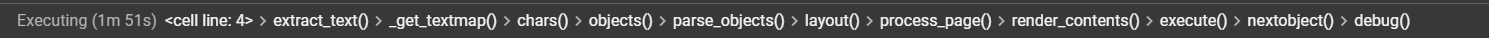

Very interesting to know how the pdfplumber goes through every step.

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
#this works in creating chunks of particular sizes. now this can be in document format or a text chunk. it deoens in which forms we are passing them ahead.

In [8]:
!pip install -U -q google-generativeai

import numpy as np
#not needed, as we arent making any array, [could have been used to store embedings in point floating format, but google embedings take care of it] or do any math
#import pandas as pd; not needed as we dont have to deal with much tabular data format
import google.generativeai as genai #using gemini and its embedings
from google.colab import userdata #for ease in hiding api key
from IPython.display import Markdown #for nice display


In [9]:
pip show google-auth

Name: google-auth
Version: 2.38.0
Summary: Google Authentication Library
Home-page: https://github.com/googleapis/google-auth-library-python
Author: Google Cloud Platform
Author-email: googleapis-packages@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: cachetools, pyasn1-modules, rsa
Required-by: bigframes, earthengine-api, gcsfs, google-ai-generativelanguage, google-api-core, google-api-python-client, google-auth-httplib2, google-auth-oauthlib, google-cloud-aiplatform, google-cloud-bigquery, google-cloud-bigquery-connection, google-cloud-bigquery-storage, google-cloud-core, google-cloud-dataproc, google-cloud-datastore, google-cloud-firestore, google-cloud-functions, google-cloud-iam, google-cloud-language, google-cloud-resource-manager, google-cloud-storage, google-cloud-translate, google-colab, google-genai, google-generativeai, gspread, keyrings.google-artifactregistry-auth, pandas-gbq, pydata-google-auth


In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", ".", "!", "?", " ", ""],#this does not imply, that at every fullstop and \n it will split, rather it will use this paramters to do so keeping in mind the chunk size
    chunk_size=600,
    chunk_overlap=100, #to ensure preservation of context
    length_function=len

)
texts = text_splitter.split_text(text)#the crazy thing and th mistake i was commiting is creating documents out these, which were intitally reqired for openai, but retrieval i
#had issue, u can actually just create text hunks too. document formating isnt a compulsory thing
texts[3]

'The Emblem of the Institute represents a\nsynthesis of Science, Humanities and Engineering\nwith Lotus representing Humanities and Social\nSciences, the Structure of Molecule representing\nScience, and the Figure of Rocket representing\nEngineering & Technology.\nThe Motto is –\n‘Knowledge is power supreme’BITS VISION\n“What do we propose to do here? We want to teach real\nscience whether it is engineering, chemistry, humanities,\nphysics or any other branch. We want to develop a\nscientific approach in Pilani, which means there would\nbe no dogma. There will be a search for truth. What we'

clearly there seems to be text mixed with \n. why not clean it to have peaceful embeddings

In [11]:
res = []
for sub in texts:
    res.append(sub.replace("\n", " "))

# printing result
res

['BIRLA INSTITUTE OF TECHNOLOGY & SCIENCE PILANI (RAJASTHAN) MEMBERS OF THE BOARD OF GOVERNORS Dr. Kumar Mangalam Birla, Chancellor Smt. Shobhana Bhartia, Pro-Chancellor Prof. Souvik Bhattacharyya, Vice-Chancellor Shri Sidharth Birla Prof. Sudhirkumar Barai Smt. Manjushree Khaitan Shri Dilip Gaur Shri Akshay Poddar Shri Hemant Kumar Shri Rakesh Ranjan Col Soumyabrata Chakraborty (Retd) Registrar, Non-member Secretary Dr. Vineet JoshiBIRLA INSTITUTE OF TECHNOLOGY & SCIENCE PILANI (RAJASTHAN) GOVERNANCE AND MANAGEMENT Dr. Kumar Mangalam Birla Chancellor Smt. Shobhana Bhartia Pro-Chancellor',
 'GOVERNANCE AND MANAGEMENT Dr. Kumar Mangalam Birla Chancellor Smt. Shobhana Bhartia Pro-Chancellor Prof. Souvik Bhattacharyya Vice-Chancellor OTHER SENIOR OFFICERS OF THE INSTITUTE DIRECTORS Prof. Sudhirkumar Barai, Pilani Campus & Prof. G. Sundar, Hyderabad Campus & Off-Campus Director-in-Charge, International Programmes and Programmes and Industry Engagement Collaborations Prof. Suman Kundu Prof.

In [12]:
texts = res

In [13]:
texts[3]

'The Emblem of the Institute represents a synthesis of Science, Humanities and Engineering with Lotus representing Humanities and Social Sciences, the Structure of Molecule representing Science, and the Figure of Rocket representing Engineering & Technology. The Motto is – ‘Knowledge is power supreme’BITS VISION “What do we propose to do here? We want to teach real science whether it is engineering, chemistry, humanities, physics or any other branch. We want to develop a scientific approach in Pilani, which means there would be no dogma. There will be a search for truth. What we'

In [14]:
len(texts)


4908

In [15]:
Google_api_key = userdata.get('banana') #its ur gateway, special key to communicate with gemini and request it to help u out
genai.configure(api_key=Google_api_key)

In [16]:
!pip install  langchain-google-genai



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [17]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [18]:
embeddings = GoogleGenerativeAIEmbeddings(model = "models/text-embedding-004", google_api_key=Google_api_key)
vector = embeddings.embed_query("hello, world!")
vector[:5]


[0.014134909026324749,
 -0.022324152290821075,
 -0.054603420197963715,
 -0.006284549366682768,
 -0.03392402455210686]

Chroma helps in converting the list of texts, into embedings using google embeddings. as this vector index is used as retriever, meaning it will return the closest 'k' documents in comaprison to another vector(which is our query here)

In [19]:
pip install chromadb


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 11.4 MB/s eta 

In [20]:
from langchain.vectorstores import Chroma

In [21]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever(search_kwargs={"k": 6})

In [22]:
from langchain.chains import RetrievalQA
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.question_answering import load_qa_chain

One of the biggest crack i found here, was that gemini-pro wasnt simply working. turns our their updated ones do. though its a seemingly easy fix, i had no clue initally about it.

In [23]:
model = ChatGoogleGenerativeAI(model = "gemini-2.0-flash", google_api_key=Google_api_key, temperature = 0.3, convert_system_message_to_human = True)

In [24]:
import warnings
# Suppress the specific warning
warnings.filterwarnings("ignore", category=UserWarning, message="Convert_system_message_to_human will be deprecated!")

In [25]:
from langchain.prompts import PromptTemplate
template = """
{context}
Question; {question}
Helpful answer: """
QA_chain_prompt = PromptTemplate.from_template(template)
qa_chain = RetrievalQA.from_chain_type(
    llm = model,
    retriever = vector_index,
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_chain_prompt}
)

#when i detailed the template to solely stick to the context, which it is already doing by default, it turned out to giving stricter outputs, often missing some imp data
#like what was the official cg cutoff. so I didnt pressurize it much!

Put your question in the box below!

In [27]:
question = "tell me what things are taught in electrical machines"
result = qa_chain.invoke({"query": question}) #langchain says, invoke is the new way to speak now.
Markdown(result["result"])



Based on the provided text, here's a breakdown of the topics covered in the "Electrical Machines" course (INSTR F211):

**1. Transformers:**

*   Constructional features
*   Equivalent circuit and phasor diagram
*   Regulation and efficiency
*   Parallel operation
*   Three-phase transformer connections
*   Harmonics in transformers
*   Testing
*   Phase conversion
*   Autotransformer

**2. D.C. Machines:**

*   Construction
*   Armature windings
*   Armature voltage and torque equations
*   Classification
*   D.C. Generators: Performance characteristics
*   D.C. Motors:
    *   Torque/speed characteristics
    *   Speed control and braking
*   Testing and efficiency

**3. Induction Machines:**

*   Constructional features
*   Rotating magnetic field
*   Circuit model and phasor diagram
*   Steady-state characteristics
*   Testing
*   Starting and speed control
*   Time harmonics and space harmonics
*   Wound rotor induction motors
*   Single-phase induction motors:
    *   Classification
    *   Equivalent circuit

**4. Synchronous Machines:**

*   Constructional features
*   Synchronous generators and motors
*   Equivalent circuit

**Bearings (Mentioned in conjunction with machines, implying relevant types are covered):**

*   Thrust bearings
*   Journal bearings
*   Hydrostatic bearings
*   Gas bearings
*   Dry and starved bearings
*   Selecting bearing type and size
*   Principles and operating limits
*   Friction, wear, and lubrication